# Parse log file to obtain trading data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
log_file = 'shared_data/static_market_making_AMETHYSTS_0.8_0.2.log'

with open(log_file, 'r') as f:
    lines = f.readlines()
    
    activity_start = 0
    while not lines[activity_start].startswith('Activities log:'):
        activity_start += 1
    activity_start += 1
    activity_end = activity_start + 1
    while lines[activity_end] != '\n':
        activity_end += 1

    trade_start = activity_end + 1
    while not lines[trade_start].startswith('Trade History:'):
        trade_start += 1
    trade_start += 1
    trade_end = len(lines)

    trade_history = ''.join(lines[trade_start:trade_end])

activity_start, activity_end, trade_start, trade_end

(10005, 14006, 14011, 25398)

In [3]:
activity_log = pd.read_csv(log_file, skiprows=activity_start, nrows=activity_end-activity_start-1, sep=';')
activity_log

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.0
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,4.0
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,0.0
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-2,199700,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,2,10005.0,25.0,NaN,NaN,10001.0,2686.0
3996,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,0.0
3997,-2,199800,AMETHYSTS,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,2686.0
3998,-2,199900,STARFRUIT,4950,32,NaN,NaN,NaN,NaN,4954,7,4956.0,32.0,NaN,NaN,4952.0,0.0


In [4]:
trade_history = pd.read_json(trade_history)
trade_history

/tmp/ipykernel_182900/41968203.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  trade_history = pd.read_json(trade_history)


,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
1,0,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
2,0,,,STARFRUIT,SEASHELLS,5003,13
3,0,,,STARFRUIT,SEASHELLS,5003,1
4,1100,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,10
...,...,...,...,...,...,...,...
1260,199400,,,STARFRUIT,SEASHELLS,4950,1
1261,199400,,,STARFRUIT,SEASHELLS,4950,3
1262,199500,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
1263,199600,,,AMETHYSTS,SEASHELLS,10002,2


In [5]:
market_trades = trade_history[(trade_history.buyer == '') & (trade_history.seller == '')]
market_trades

,timestamp,buyer,seller,symbol,currency,price,quantity
2,0,,,STARFRUIT,SEASHELLS,5003,13
3,0,,,STARFRUIT,SEASHELLS,5003,1
7,1700,,,AMETHYSTS,SEASHELLS,10002,1
8,1700,,,STARFRUIT,SEASHELLS,5002,8
10,1900,,,STARFRUIT,SEASHELLS,5002,1
...,...,...,...,...,...,...,...
1259,199400,,,STARFRUIT,SEASHELLS,4950,2
1260,199400,,,STARFRUIT,SEASHELLS,4950,1
1261,199400,,,STARFRUIT,SEASHELLS,4950,3
1263,199600,,,AMETHYSTS,SEASHELLS,10002,2


In [6]:
own_trades = trade_history[(trade_history.buyer == 'SUBMISSION') | (trade_history.seller == 'SUBMISSION')]
own_trades

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
1,0,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
4,1100,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,10
5,1200,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
6,1300,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
...,...,...,...,...,...,...,...
1248,198500,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,2
1251,198900,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
1253,199000,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,2
1257,199400,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1


# Visualize market trades and own trades

In [7]:
products = market_trades.symbol.unique()
products

array(['STARFRUIT', 'AMETHYSTS'], dtype=object)

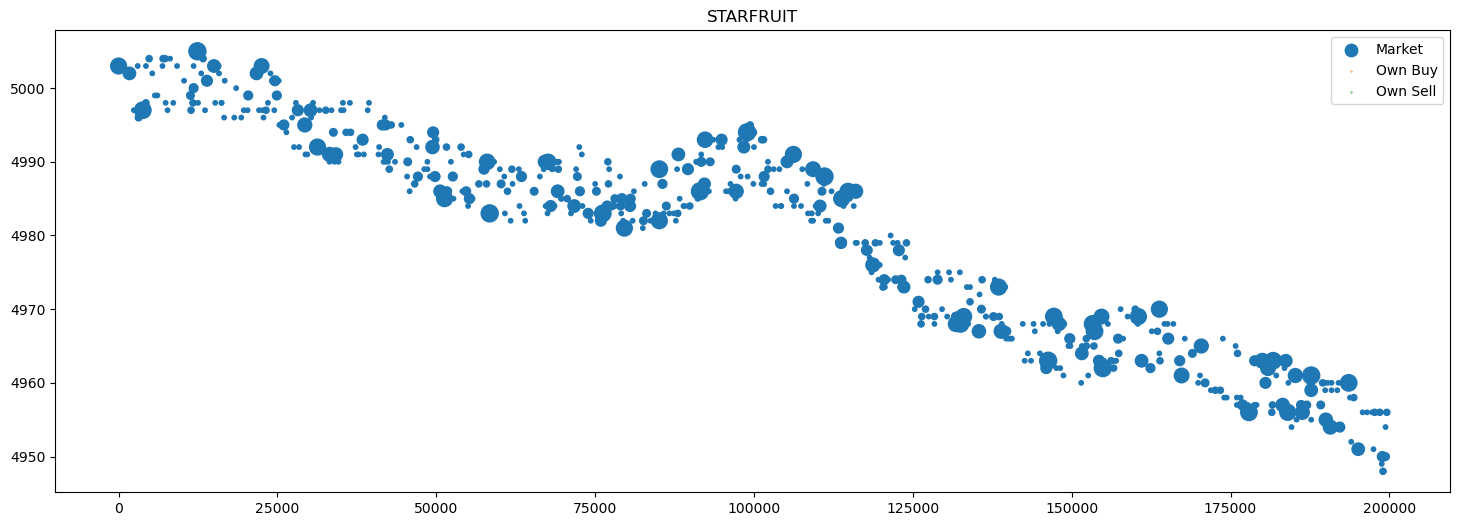

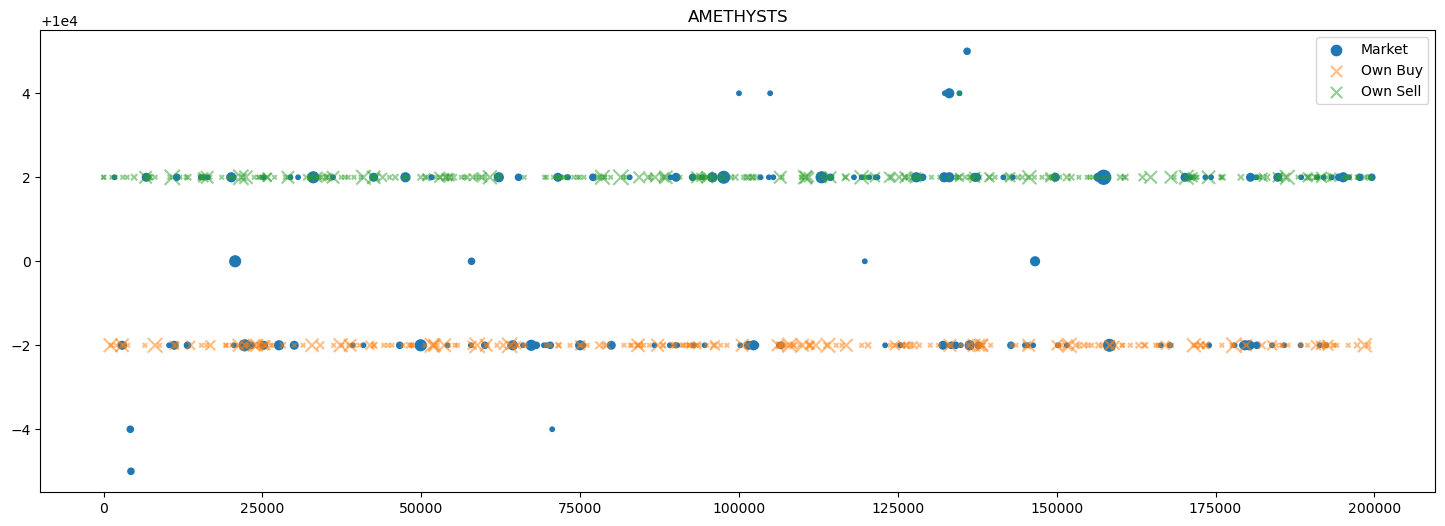

In [8]:
for symbol in products:
    market = market_trades[market_trades.symbol == symbol]
    own_buy = own_trades[(own_trades.symbol == symbol) & (own_trades.buyer == 'SUBMISSION')]
    own_sell = own_trades[(own_trades.symbol == symbol) & (own_trades.seller == 'SUBMISSION')]
    
    plt.figure(figsize=(18, 6))
    plt.scatter(market.timestamp, market.price, label='Market', s=10*market.quantity)
    plt.scatter(own_buy.timestamp, own_buy.price, label='Own Buy', s=10*own_buy.quantity, marker='x', alpha=0.5)
    plt.scatter(own_sell.timestamp, own_sell.price, label='Own Sell', s=10*own_sell.quantity, marker='x', alpha=0.5)
    plt.legend()
    plt.title(symbol)
    plt.show()

# Statistics of products (look at only market trades)

## AMETHYSTS

In [9]:
market = market_trades[market_trades.symbol == 'AMETHYSTS']
market

,timestamp,buyer,seller,symbol,currency,price,quantity
7,1700,,,AMETHYSTS,SEASHELLS,10002,1
14,2900,,,AMETHYSTS,SEASHELLS,9998,3
20,3200,,,AMETHYSTS,SEASHELLS,9998,1
26,4200,,,AMETHYSTS,SEASHELLS,9996,2
27,4300,,,AMETHYSTS,SEASHELLS,9995,2
...,...,...,...,...,...,...,...
1227,194400,,,AMETHYSTS,SEASHELLS,10002,2
1231,195100,,,AMETHYSTS,SEASHELLS,10002,4
1238,196000,,,AMETHYSTS,SEASHELLS,10002,1
1245,197700,,,AMETHYSTS,SEASHELLS,10002,2


In [10]:
market.describe()

,timestamp,price,quantity
count,166.000000,166.000000,166.000000
mean,104583.132530,9999.927711,2.006024
std,57755.327855,2.181371,1.523540
min,1700.000000,9995.000000,1.000000
25%,60550.000000,9998.000000,1.000000
50%,104800.000000,9998.000000,1.000000
75%,149000.000000,10002.000000,3.000000
max,199600.000000,10005.000000,10.000000


In [11]:
# Weighted average price
(market.price * market.quantity).sum() / market.quantity.sum()

10000.048048048047

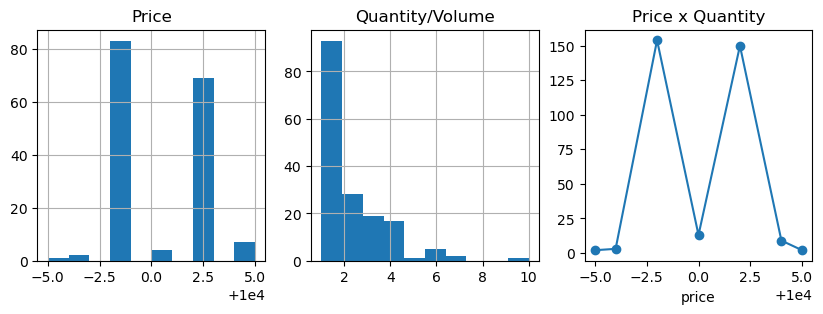

In [12]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
market.price.hist()
plt.title('Price')

plt.subplot(1, 3, 2)
market.quantity.hist()
plt.title('Quantity/Volume')

plt.subplot(1, 3, 3)
market.groupby('price').quantity.sum().plot(marker='o')
plt.title('Price x Quantity')

plt.show()

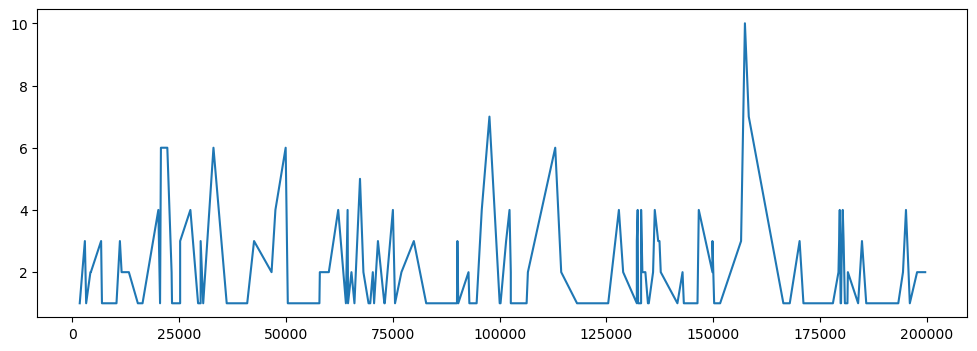

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(market.timestamp, market.quantity)
plt.show()

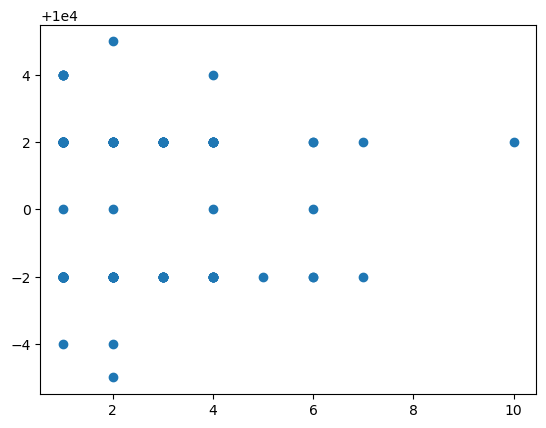

In [14]:
plt.scatter(market.quantity, market.price)
plt.show()

### Key observations
The product follows very simple statistics. 
- The price is flat and fluctuates within +/- 5, with a mean around 10000
- The quantity/volume follows a fat tail distribution, usually low around 1~ 2 but can occasionally go up to 10

### Trading strategy

According to the statistics, there is no inventory risk associated with holding/shorting the product because the price is flat.
To maximize profit, we could place orders with equal probability of buying and selling, at different stages of price deviation.

The strategy could be:
- Place buy orders at price at 9998 (80%), 9996 (20%)
- Place sell orders at price at 10002 (80%), 10004 (20%)

# STARFRUIT
